In [ ]:
!pip install gymnasium
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [ ]:
import numpy as np
import bms_env
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random


from utils import *


# Import the necessary libraries
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

In [ ]:
bms = bms_env.BMSenv(num_cells= 2, k_tanh_params= [0.75, 1.5], Q_cells = [2.35, 2.35])
bms = bms_env.BMSenv(num_cells= 5, k_tanh_params= [0.8, 2.5, 0.5, 1.5, 2], Q_cells = [2.35, 1., 0.5, 3, 1.75])
bms = bms_env.BMSenv(num_cells= 8, k_tanh_params= np.random.uniform(0.75, 2.5, 8), Q_cells = np.random.uniform(0.75, 5, 8))

print(bms)

BMSenv(num_cells=8,
        k_tanh_params=[1.24421627 1.88118188 1.26288136 2.24243705 0.9692264  1.71538671
 1.4667541  1.84211729],
        Q_cells=[0.77165759 1.13978955 3.60212741 3.66947133 3.28033688 1.65182955
 3.64876423 4.00667619],
        MAX_VOLTAGE=4.2,
        MIN_VOLTAGE=2.2,
        INIT_SOC=0.9,
        I_CURRENT=0.22,
        TIMESTEP=0.001,
        w_reward=100.0,
        current_state=[4.19999 4.19999 4.19999 4.19999 4.19999 4.19999 4.19999 4.19999],
        current_soc=[0.89452099 0.89956854 0.89491265 0.89989824 0.88376384 0.89916299
 0.89774122 0.89949561])


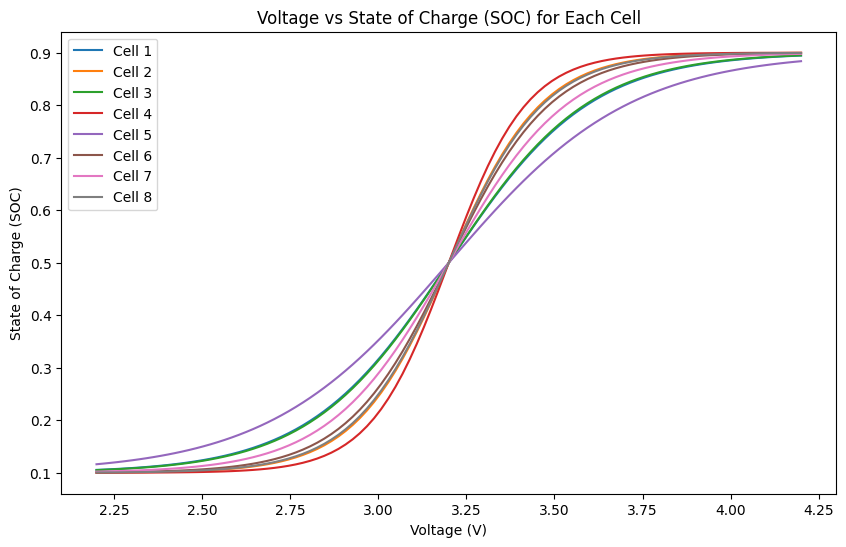

In [ ]:
plot_voltage_vs_soc(bms)

In [ ]:
T = 20_000

# Always disconected (All the batteries stay still)

In [ ]:
bms.reset()
states_1 = [bms.state]
states_soc_1 = [bms.state_soc]
actions_1 = []
rewards_1 = []
dones_1 = [False]
actions_int_1 = []

while not dones_1[-1] and len(states_1) < T:
    action = 0
    actions_int_1.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_1.append(state)
    states_soc_1.append(bms.state_soc)
    actions_1.append(bms.int_action_to_switch_action(action))
    rewards_1.append(reward)
    dones_1.append(done)

print(f"Sum of rewards: {np.sum(rewards_1)}")

Sum of rewards: -1999900


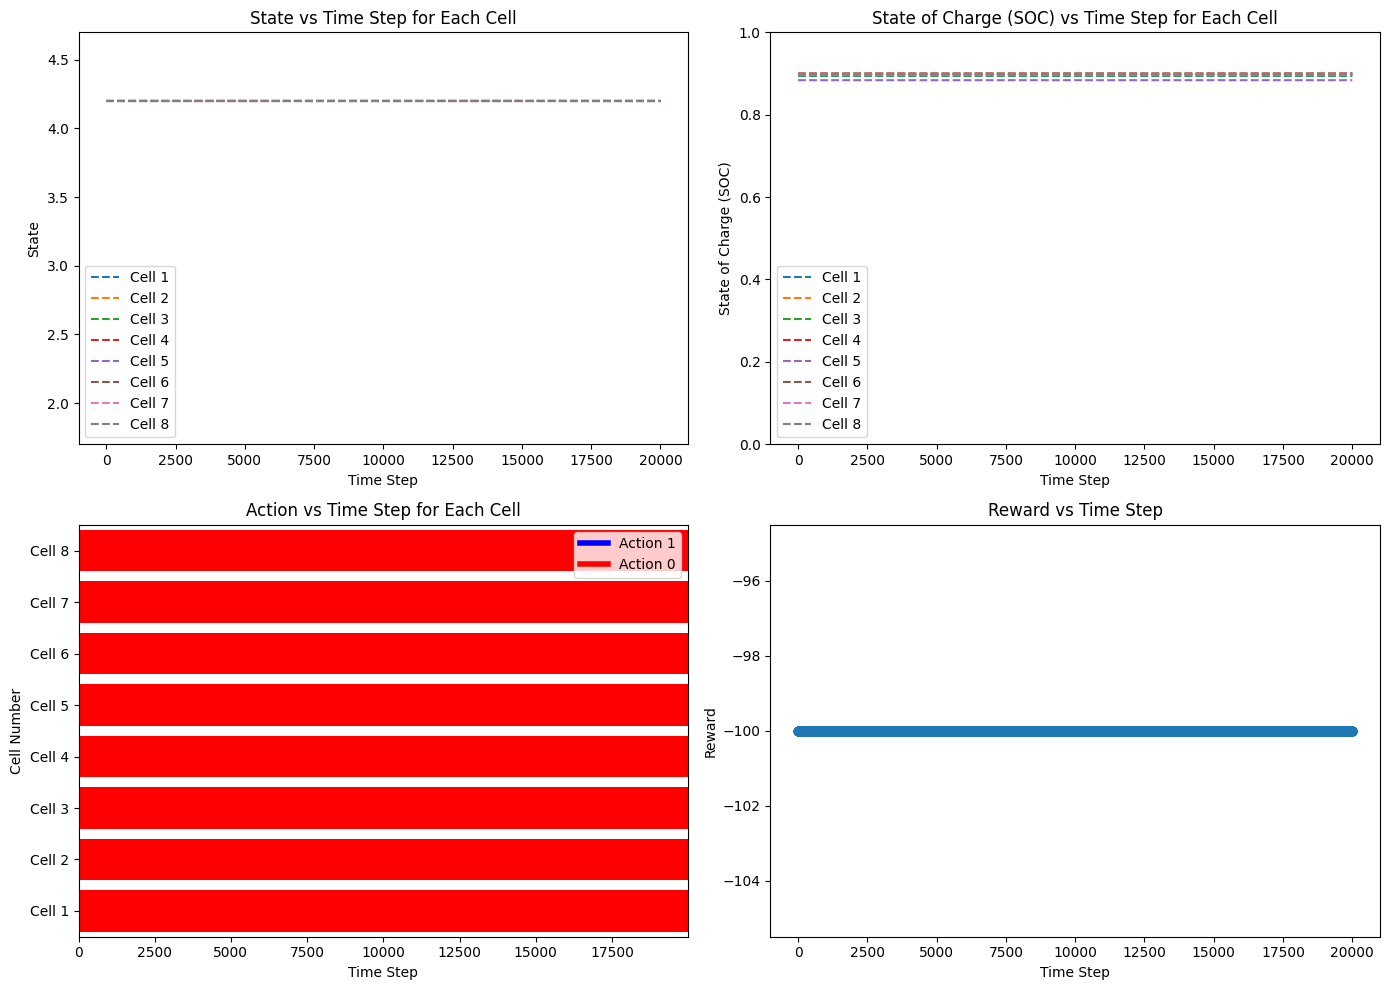

In [ ]:
plot_bms_evolution(bms, states_1, states_soc_1, actions_1, rewards_1, dones_1, include_bad_rewards=True)

# Always connected (All the batteries Discharge)

In [ ]:
bms.reset()
states_2 = [bms.state]
states_soc_2 = [bms.state_soc]
actions_2 = []
rewards_2 = []
dones_2 = [False]
actions_int_2 = []

while not dones_2[-1] and len(states_2) < T:
    action = bms.num_cells - 1
    actions_int_2.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_2.append(state)
    states_soc_2.append(bms.state_soc)
    actions_2.append(bms.int_action_to_switch_action(action))
    rewards_2.append(reward)
    dones_2.append(done)

print(f"Sum of rewards: {np.sum(rewards_2)}")

Sum of rewards: -26.68040528176582


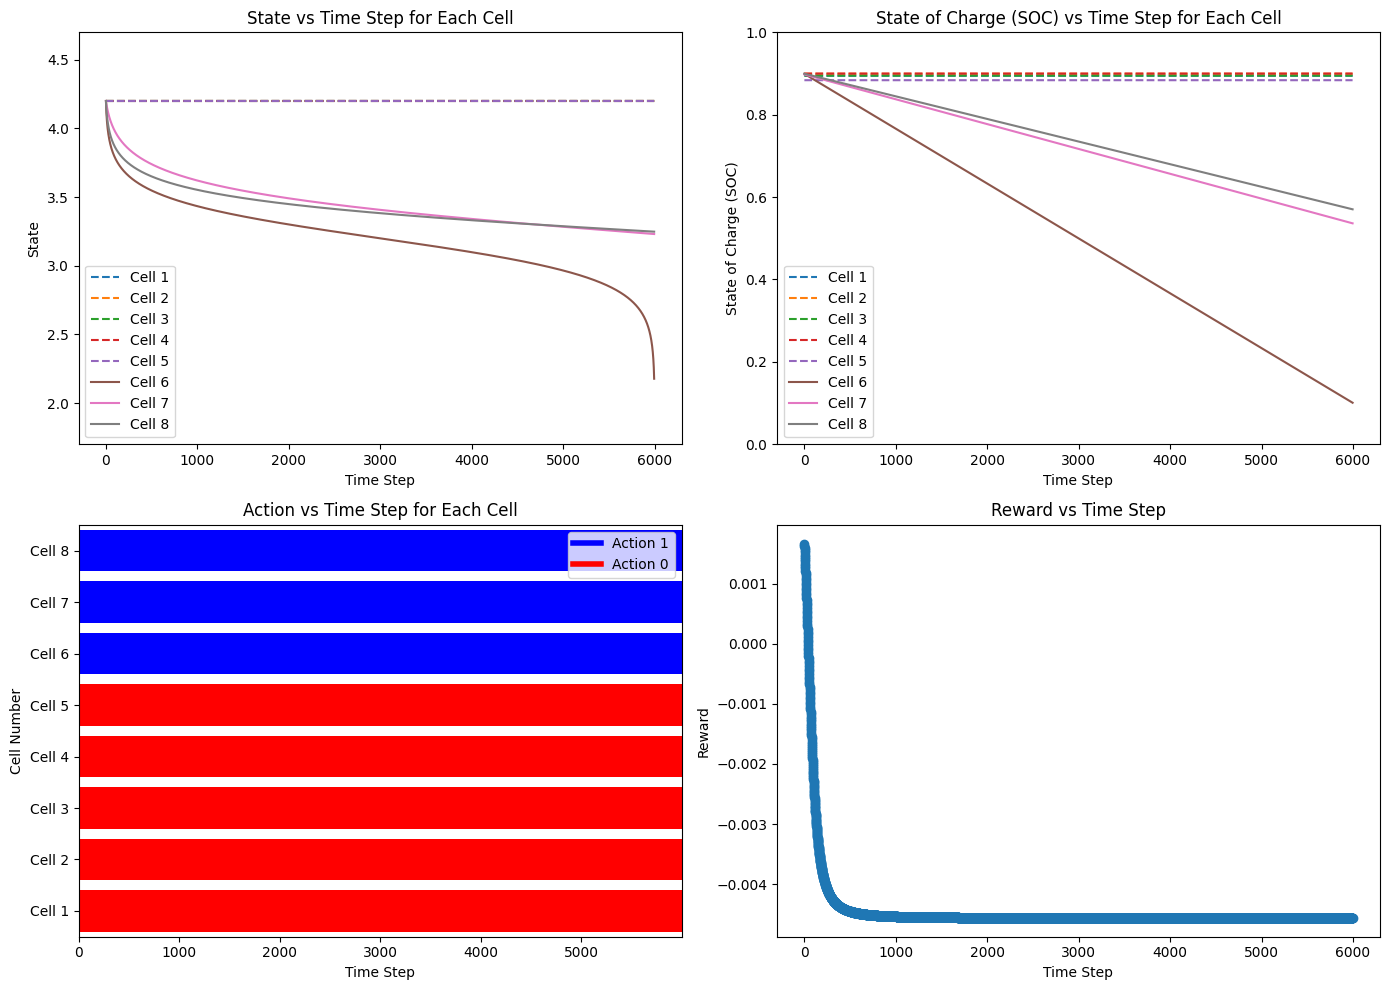

In [44]:
plot_bms_evolution(bms, states_2, states_soc_2, actions_2, rewards_2, dones_2)

# Cell 2 always discharging and Cell 1 always disconnected (still)

In [ ]:
bms.reset()
states_3 = [bms.state]
states_soc_3 = [bms.state_soc]
actions_3 = []
rewards_3 = []
dones_3 = [False]
actions_int_3 = []

while not dones_3[-1] and len(states_3) < T:
    action = 1
    actions_int_3.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_3.append(state)
    states_soc_3.append(bms.state_soc)
    actions_3.append(bms.int_action_to_switch_action(action))
    rewards_3.append(reward)
    dones_3.append(done)

print(f"Sum of rewards: {np.sum(rewards_3)}")

Sum of rewards: -100.32442738011729


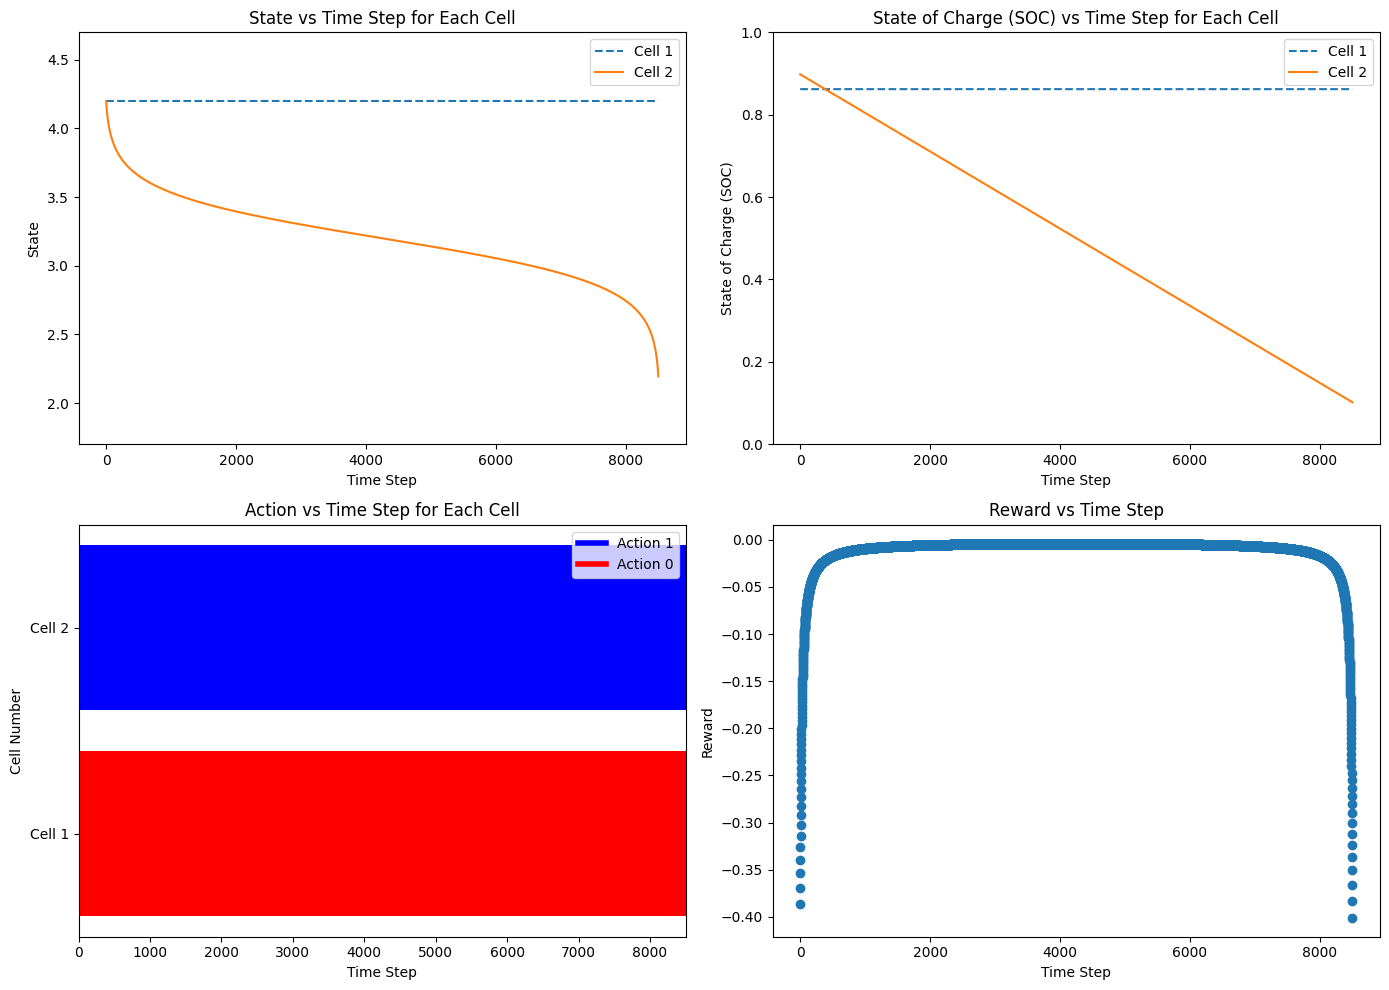

In [ ]:
plot_bms_evolution(bms, states_3, states_soc_3, actions_3, rewards_3, dones_3)

# Cell 1 always discharging and Cell 2 always disconnected (still)

In [ ]:
bms.reset()
states_4 = [bms.state]
states_soc_4 = [bms.state_soc]
actions_4 = []
rewards_4 = []
dones_4 = [False]
actions_int_4 = []

while not dones_4[-1] and len(states_4) < T:
    action = 2
    actions_int_4.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_4.append(state)
    states_soc_4.append(bms.state_soc)
    actions_4.append(bms.int_action_to_switch_action(action))
    rewards_4.append(reward)
    dones_4.append(done)

print(f"Sum of rewards: {np.sum(rewards_4)}")

Sum of rewards: -100.00417710231848


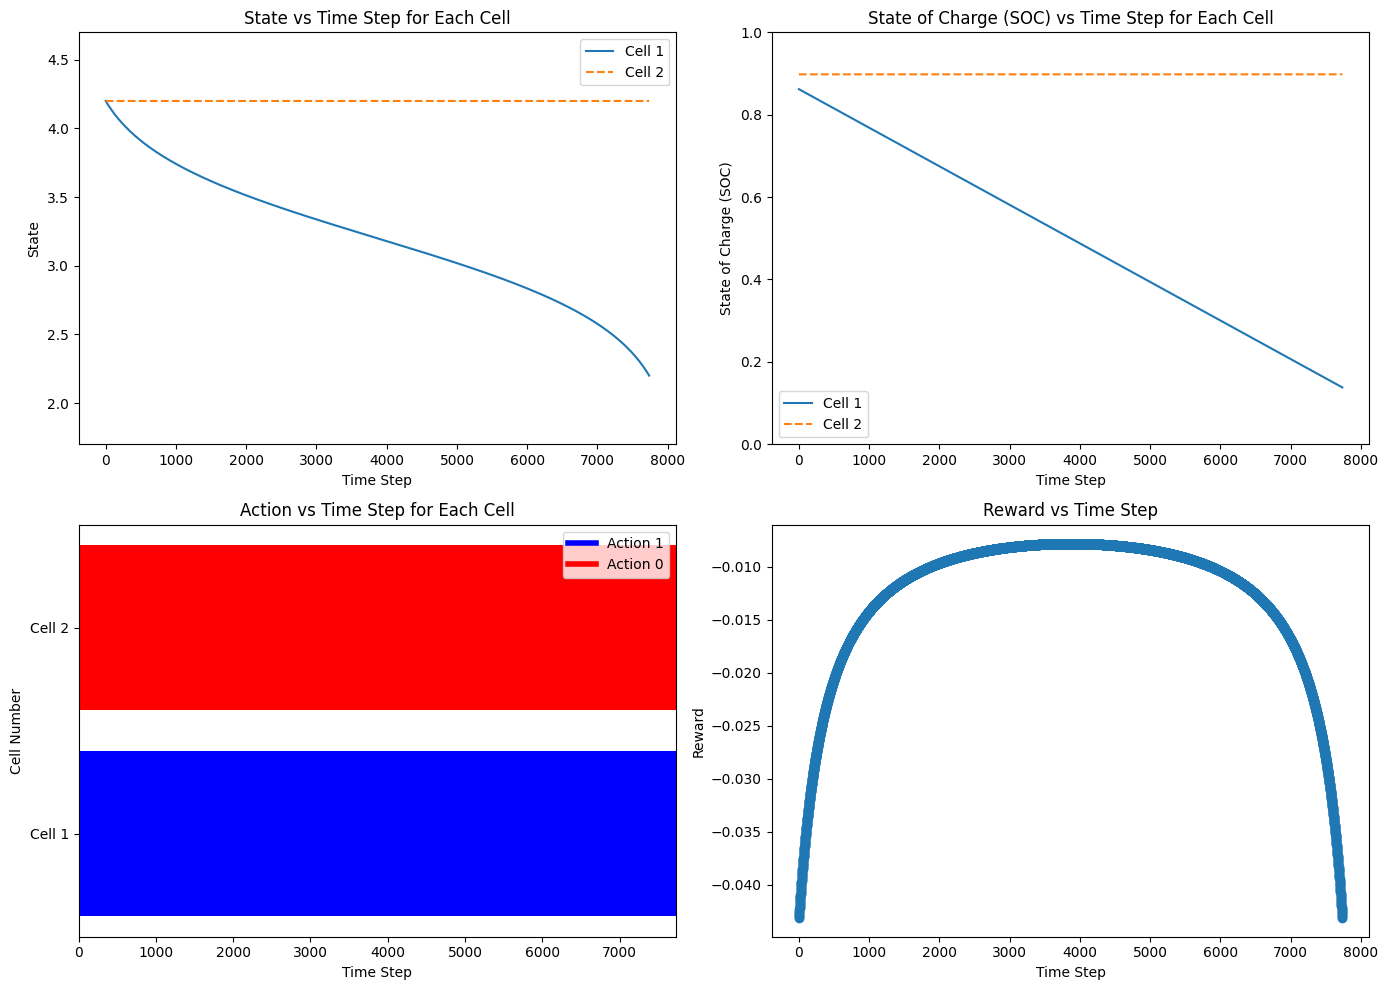

In [ ]:
plot_bms_evolution(bms, states_4, states_soc_4, actions_4, rewards_4, dones_4)

# Random Controller

In [45]:
bms.reset()
states_5 = [bms.state]
states_soc_5 = [bms.state_soc]
actions_5 = []
rewards_5 = []
dones_5 = [False]
actions_int_5 = []

while not dones_5[-1] and len(states_5) < T:
    action = bms.action_space.sample()
    # while action == 0:
    #     action = bms.action_space.sample()
    actions_int_5.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_5.append(state)
    states_soc_5.append(bms.state_soc)
    actions_5.append(bms.int_action_to_switch_action(action))
    rewards_5.append(reward)
    dones_5.append(done)

print(f"Sum of rewards: {np.sum(rewards_5)}")

Sum of rewards: -3221.423860669046


In [ ]:
plot_bms_evolution(bms, states_5, states_soc_5, actions_5, rewards_5, dones_5)

In [ ]:
plt.hist(actions_int_5)

# TABULAR Q-Learning

In [ ]:
bins = np.array([2.2, 2.5, 2.8, 3, 3.15, 3.30 , 3.40, 3.50 , 3.65, 3.80, 4.0 ,4.2])



In [ ]:
bins

In [ ]:
print(bms.int_action_to_switch_action(0))
print(bms.int_action_to_switch_action(1))
print(bms.int_action_to_switch_action(2))
print(bms.int_action_to_switch_action(3))

In [ ]:
state_count, action_count = (len(bins) - 1)**bms.num_cells, 2**bms.num_cells
state_count, action_count
Q = np.zeros((state_count, action_count))
Q[:, 0] = -100

bms.reset()
states_6= [bms.state]
states_soc_6 = [bms.state_soc]
actions_6 = []
rewards_6 = []
dones_6 = [False]
random_actions_6 = []
actions_int_6 = []
states_int_6 = [features_to_unique_integer(states_6[-1], bins)]

epsilon = 0.0
stepsize = 0.5
gamma = 0.99

while not dones_6[-1] and len(states_6) < T:

    state_int  = features_to_unique_integer(states_6[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions_6.append(True)
        action = bms.action_space.sample()
        # while action == 0:
        #     action = bms.action_space.sample()
    else:
        random_actions_6.append(False)
        # action = np.argmax(Q[state_int, :])
        max_indices = np.flatnonzero(Q[state_int, :] == Q[state_int, :].max())
        action = np.random.choice(max_indices)


    actions_int_6.append(action)

    state, reward, done, _ , _= bms.step(action)
    states_6.append(state)
    states_soc_6.append(bms.state_soc)
    actions_6.append(bms.int_action_to_switch_action(action))
    rewards_6.append(reward)
    dones_6.append(done)


    if not done:
        next_state_int = features_to_unique_integer(state, bins)
        states_int_6.append(next_state_int)
        Q[state_int, action] = Q[state_int, action] + stepsize * (reward + gamma * np.max(Q[next_state_int, :]) - Q[state_int, action])


print(f"Sum of rewards: {np.sum(rewards_6)}")

# Efficient Tabular Q-Learning

In [ ]:
state_count, action_count = (len(bins) - 1) ** bms.num_cells, 2 ** bms.num_cells

# Use defaultdict to store Q-values
Q = defaultdict(lambda: [-100] + [0] * (action_count - 1))

bms.reset()
states_6 = [bms.state]
states_soc_6 = [bms.state_soc]
actions_6 = []
rewards_6 = []
dones_6 = [False]
random_actions_6 = []
actions_int_6 = []
states_int_6 = [features_to_unique_integer(states_6[-1], bins)]

epsilon = 0.0
stepsize = 0.5
gamma = 0.99

while not dones_6[-1] and len(states_6) <  T:

    state_int = features_to_unique_integer(states_6[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions_6.append(True)
        action = bms.action_space.sample()
    else:
        random_actions_6.append(False)
        # Find the maximum Q-value
        q_values = Q[state_int]
        max_q_value = np.max(q_values)
        # Identify all actions with the maximum Q-value
        max_actions = [a for a, q in enumerate(q_values) if q == max_q_value]
        # Randomly choose one of the actions with the maximum Q-value
        action = random.choice(max_actions)

    actions_int_6.append(action)

    state, reward, done, _, _ = bms.step(action)
    states_6.append(state)
    states_soc_6.append(bms.state_soc)
    actions_6.append(bms.int_action_to_switch_action(action))
    rewards_6.append(reward)
    dones_6.append(done)

    if not done:
        next_state_int = features_to_unique_integer(state, bins)
        states_int_6.append(next_state_int)
        Q[state_int][action] = Q[state_int][action] + stepsize * (
            reward + gamma * max(Q[next_state_int]) - Q[state_int][action]
        )

print(f"Sum of rewards: {np.sum(rewards_6)}")


In [ ]:
plot_bms_evolution(bms, states_6, states_soc_6, actions_6, rewards_6, dones_6, random_actions_6)

In [ ]:
plt.hist(states_int_6)

# DQN

In [ ]:
bms.reset()
# Check if the environment follows the gym interface
check_env(bms)

In [ ]:

# Define the DQN model
# model = DQN('MlpPolicy', bms, verbose=1, exploration_initial_eps = 0.01,
#              exploration_final_eps = 0.01, batch_size= 128, target_update_interval= 5_000)

model = DQN('MlpPolicy', bms, verbose=1, exploration_initial_eps= 0.001,
             exploration_final_eps=0.001, batch_size= 500, target_update_interval= 2_000, learning_rate= 0.0001)

# Train the model
# Note: Start with high epsilon for exploration and gradually reduce it for exploitation.
model.learn(total_timesteps= 250_000)

# Save the model
model.save("dqn_bms")



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.32e+04 |
|    ep_rew_mean      | -120     |
|    exploration_rate | 0.001    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 578      |
|    time_elapsed     | 91       |
|    total_timesteps  | 52798    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000222 |
|    n_updates        | 13174    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.24e+04 |
|    ep_rew_mean      | -125     |
|    exploration_rate | 0.001    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 586      |
|    time_elapsed     | 169      |
|    total_timesteps  | 99273    |
| train/              |        

In [ ]:
# Load the model
model = DQN.load("dqn_bms")

# Evaluate the model
bms.reset()
states_7 = [bms.state]
states_soc_7 = [bms.state_soc]
actions_7 = []
rewards_7 = []
dones_7 = [False]
actions_int_7 = []

while not dones_7[-1] and len(states_7) <  T:
    action, _ = model.predict(bms.state)
    actions_int_7.append(action)
    state_7, reward_7, done_7, _ , _= bms.step(action)
    states_7.append(state_7)
    states_soc_7.append(bms.state_soc)
    actions_7.append(bms.int_action_to_switch_action(action))
    rewards_7.append(reward_7)
    dones_7.append(done_7)

print(f"Sum of rewards: {np.sum(rewards_7)}")

Sum of rewards: -159.64889290853023


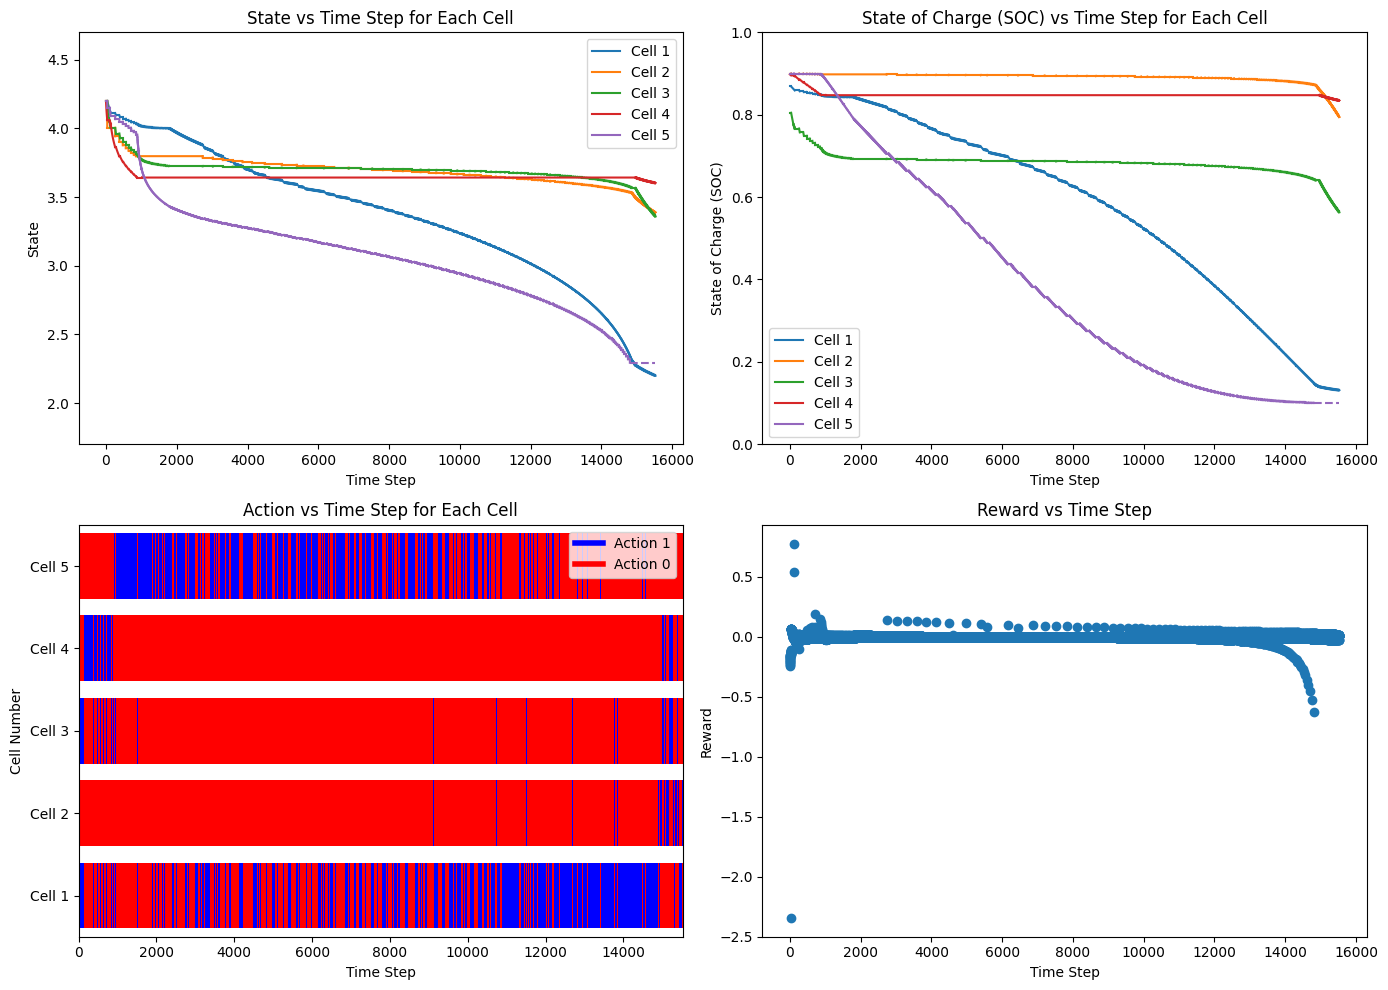

In [ ]:
plot_bms_evolution(bms, states_7, states_soc_7, actions_7, rewards_7, dones_7)